In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [5]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.shape

(10000, 11)

In [7]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [12]:
x = df.drop(columns=['Exited'],axis=1)
y = df['Exited']

In [14]:
numerical_colums = [col for col in x.columns if x[col].dtype != "O"]
categorical_colums = [col for col in x.columns if x[col].dtype == "O"]
print(f'num colums lenght is {len(numerical_colums)} columns is {numerical_colums}')
print(f'cat colums lenght is {len(categorical_colums)} columns is {categorical_colums}')

num colums lenght is 8 columns is ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
cat colums lenght is 2 columns is ['Geography', 'Gender']


In [18]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

cat_pipe = Pipeline(steps=[
    ('cat',OneHotEncoder(drop='first',sparse_output=False))
])
num_pipe = Pipeline(steps=[
    ('num',StandardScaler())
])

prossesor = ColumnTransformer([
    ('num_col',num_pipe,numerical_colums),
    ('cat_col',cat_pipe,categorical_colums)
],remainder='passthrough')

X_train_scaled = prossesor.fit_transform(X_train)
X_test_scaled = prossesor.transform(X_test)

In [20]:
X_train_scaled.shape

(8000, 11)

In [35]:
model = Sequential()
model.add(Dense(10,activation='relu',input_dim=11))
model.add(Dense(8,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

/opt/anaconda3/envs/tensorflow/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 10)             │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 6)              │            54 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4)              │            28 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 303 (1.18 KB)

 Trainable params: 303 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
history = model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 851us/step - accuracy: 0.7959 - loss: 0.5997 - val_accuracy: 0.7987 - val_loss: 0.4693
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - accuracy: 0.7910 - loss: 0.4728 - val_accuracy: 0.7987 - val_loss: 0.4304
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step - accuracy: 0.7943 - loss: 0.4448 - val_accuracy: 0.7987 - val_loss: 0.4198
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - accuracy: 0.7923 - loss: 0.4308 - val_accuracy: 0.7987 - val_loss: 0.4153
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 570us/step - accuracy: 0.7897 - loss: 0.4396 - val_accuracy: 0.8275 - val_loss: 0.4126
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step - accuracy: 0.8069 - loss: 0.4401 - val_accuracy: 0.8338 - val_loss: 0.4096
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step - accuracy: 0.8105 - loss: 0.4307 - val_accuracy: 0.8381 - val_loss: 0.4071
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - accuracy: 0.8207 - loss: 0

In [38]:
history.history

{'accuracy': [0.792187511920929,
  0.7934374809265137,
  0.7934374809265137,
  0.7934374809265137,
  0.7985937595367432,
  0.8142187595367432,
  0.8173437714576721,
  0.8168749809265137,
  0.819531261920929,
  0.8198437690734863,
  0.8253124952316284,
  0.831250011920929,
  0.8387500047683716,
  0.8460937738418579,
  0.8506249785423279,
  0.8526562452316284,
  0.8568750023841858,
  0.8571875095367432,
  0.8595312237739563,
  0.8589062690734863,
  0.8607812523841858,
  0.8596875071525574,
  0.862500011920929,
  0.8612499833106995,
  0.8635937571525574,
  0.8620312213897705,
  0.8635937571525574,
  0.8626562356948853,
  0.8617187738418579,
  0.862500011920929,
  0.8634374737739563,
  0.8628125190734863,
  0.8631250262260437,
  0.8643749952316284,
  0.8645312786102295,
  0.8648437261581421,
  0.8637499809265137,
  0.8657812476158142,
  0.8653125166893005,
  0.8660937547683716,
  0.8645312786102295,
  0.8631250262260437,
  0.8659374713897705,
  0.8678125143051147,
  0.8651562333106995,
  0

In [39]:
model.layers[1].get_weights()

[array([[ 0.19907373, -0.12566637, -0.55589026, -0.3542451 ,  0.60569376,
         -0.23920962,  0.07835463,  0.6859597 ],
        [ 0.07201709,  0.24766338,  0.04517668, -0.04070488, -0.14517547,
         -1.1151377 ,  0.3057472 ,  0.43930164],
        [-0.89816374,  0.10396048,  0.69009477,  0.0878578 ,  0.06076487,
         -0.00457034, -0.16206531,  0.24551234],
        [-0.52915454,  0.61859083,  0.20129624,  0.2999969 , -0.44810486,
          0.1531224 ,  0.47845516, -0.11991792],
        [ 0.4456219 , -1.4569627 ,  0.2304386 , -0.22873838, -0.24092269,
          0.73813015, -0.8488274 , -0.43812028],
        [ 0.42781672,  0.7821295 ,  0.33139333,  0.62346584, -0.10688043,
          0.38876602,  0.22559635,  0.29322818],
        [-0.17942144, -0.42902043, -0.13037471, -0.7828352 , -0.10260686,
          0.7945039 , -0.4345308 , -0.5973098 ],
        [-0.3840691 ,  0.14655846,  0.930247  , -0.67198175,  0.13217492,
         -0.2691703 ,  0.5290956 , -0.09190596],
        [ 0.6118

In [40]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step


In [41]:
y_pred = np.where(y_log>0.5,1,0)

In [42]:
accuracy_score(y_test,y_pred)

0.8665

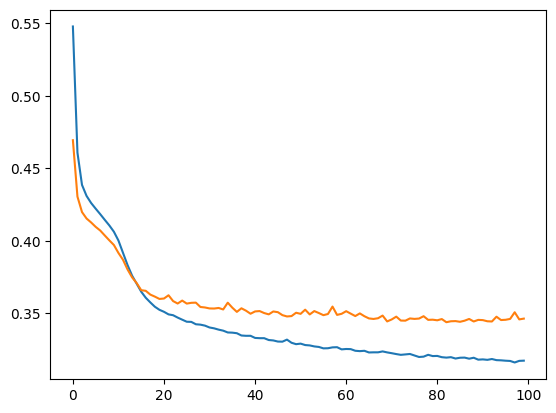

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

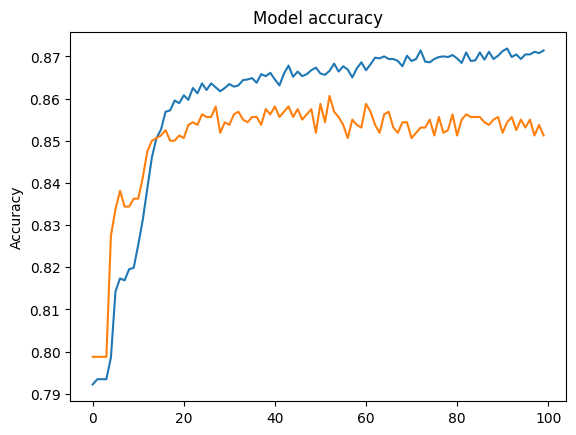

In [44]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.show()